In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv('nn_data.csv')
X = data[['X1', 'X2']].values
Y = data['Y'].values.reshape(-1, 1) 

class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 8
        hiddenLayer3Neurons = 6
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        
    
        self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3H2 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_OH3 = np.random.randn(hiddenLayer3Neurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
       
        self.hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(self.hidden1_input)
        
       
        self.hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(self.hidden2_input)
        
       
        self.hidden3_input = np.dot(self.hidden2_output, self.W_H3H2)
        self.hidden3_output = self.sigmoid(self.hidden3_input)
        
       
        output_input = np.dot(self.hidden3_output, self.W_OH3)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.sigmoid(self.hidden3_output, der=True)
        
        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)
        
        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)
        
        
        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)




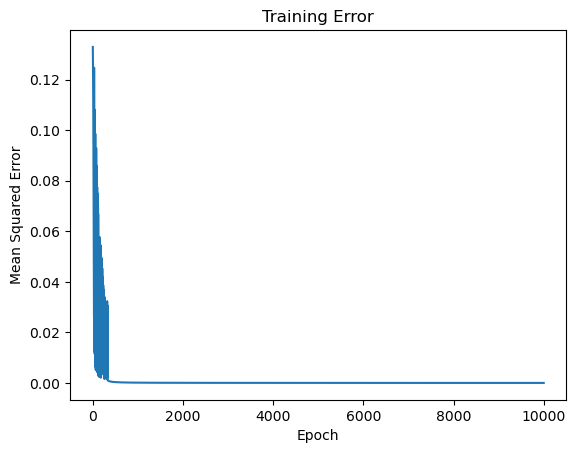

In [2]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X, Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))


plt.plot(err)
plt.title('Training Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()




In [3]:
print("Predictions:")
print("X1 | X2 | Prediction")
print("-------------------")
for x in X:
    prediction = NN.feedForward(x)
    print(f"{x[0]} | {x[1]} | {prediction[0]}")

Predictions:
X1 | X2 | Prediction
-------------------
91 | 12 | 0.9990695335702032
98 | 22 | 0.9990695335702032
57 | 9 | 0.9990695335702394
39 | 33 | 0.001493435714063127
73 | 13 | 0.9990695335702032
55 | 3 | 0.9990695335719377
52 | 22 | 0.9990646996052087
87 | 18 | 0.9990695335702032
49 | 34 | 0.0014812519154757287
58 | 28 | 0.9965790830608552
77 | 26 | 0.9990695335688901
90 | 5 | 0.9990695335702032
96 | 14 | 0.9990695335702032
84 | 6 | 0.9990695335702032
37 | 35 | 0.0015613182072513432
71 | 14 | 0.9990695335702034
78 | 9 | 0.9990695335702032
37 | 10 | 0.9990695329762109
51 | 35 | 0.0014811977146093848
46 | 12 | 0.9990695335748196
64 | 10 | 0.9990695335702052
47 | 27 | 0.0014971157760692419
77 | 6 | 0.9990695335702034
75 | 10 | 0.9990695335702032
61 | 12 | 0.9990695335702154
92 | 4 | 0.9990695335702032
54 | 14 | 0.9990695335706297
54 | 12 | 0.9990695335705803
81 | 31 | 0.9990695332826215
44 | 36 | 0.0014847531570320047
45 | 18 | 0.999067619858488
56 | 3 | 0.9990695335715133
77 | 6 | 0

In [4]:
print(NN.feedForward([88,22]))

[0.99906953]


In [5]:
print(NN.feedForward([44,22]))

[0.42001739]
